In [32]:
import pandas as pd 
import numpy as np

In [142]:
train = pd.read_csv("data/train.csv", index_col=["PassengerId"])
print(train.shape)
train.head(3)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [143]:
test = pd.read_csv("data/test.csv", index_col=["PassengerId"])
print(test.shape)
test.head(3)

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [144]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [145]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [146]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [149]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = test["Fare"].mean()

In [150]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [151]:
test.loc[1044].to_frame().T

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,35.6272,NaN,S


In [152]:
train.loc[1, "Sex"], train.loc[2, "Sex"]

('male', 'female')

In [153]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [154]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q


In [155]:
embarked = pd.get_dummies(train["Embarked"])
train.drop(columns="Embarked", axis=1, inplace=True)

train[["C", "Q", "S"]] = embarked
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0


In [157]:
embarked = pd.get_dummies(test["Embarked"])
test.drop(columns="Embarked", axis=1, inplace=True)

test[["C", "Q", "S"]] = embarked
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,1


In [158]:
feature = ["Pclass", "Sex", "Fare", "C", "Q", "S"]
X_train = train[feature]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,C,Q,S
PassengerId,,,,,,
1,3,0,7.2500,0,0,1
2,1,1,71.2833,1,0,0
3,3,1,7.9250,0,0,1
4,1,1,53.1000,0,0,1
5,3,0,8.0500,0,0,1


In [159]:
y_train = train["Survived"]

print(y_train.shape)
y_train.head().to_frame()

(891,)


,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [160]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

tree = DecisionTreeClassifier(max_depth=3, random_state=999)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=999)

In [161]:
export_graphviz(tree,
               feature_names=feature,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

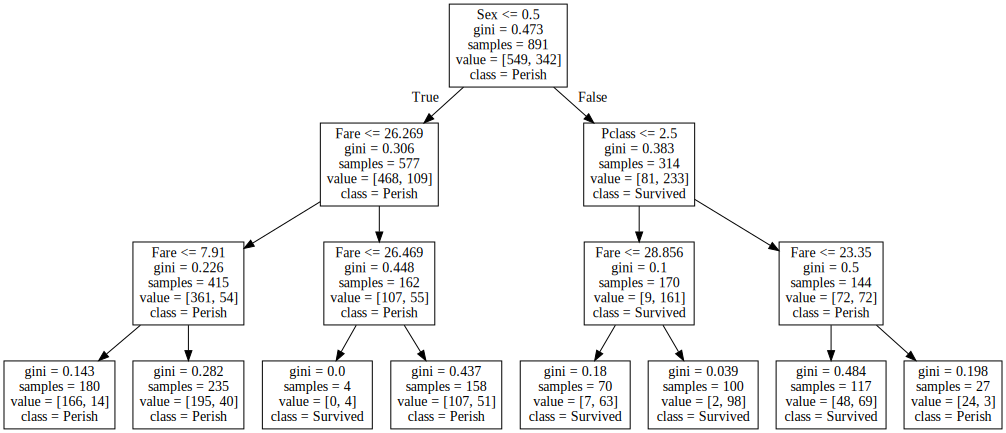

In [162]:
# 성별("Sex")을 Survived를 결정하는 가장 큰 요소로 판단

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [163]:
X_test = test[feature]
prediction = tree.predict(X_test)
submission = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")
submission["Survived"] = prediction
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [164]:
submission.to_csv("submission.csv")

![](https://user-images.githubusercontent.com/83874157/128620821-06b2e37a-06c1-4e65-9d59-3c31ecf72fe0.PNG)
